Some place to construct plots

In [54]:
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from functools import *
import time
from tensorflow.examples.tutorials.mnist import input_data
#onehot means a vector is 1 in a single dimension and 0 in every other
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
sess = tf.InteractiveSession()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [20]:
n_inputs = 784
n_classes = 10
epochs = 1
batch_sizes = (5000,2000,1000,500,250,100,50,25,10)

array_accuracy=[[0 for _ in batch_sizes] for _ in range(5)]
array_time=[[0 for _ in batch_sizes] for _ in range(5)]
a = 0
b = 0

x = tf.placeholder('float', [None, n_inputs])
y = tf.placeholder('float',[None, 10])


weights = {
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [21]:
def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')

In [22]:
def conv2d(x, W, b, k=1):
    x = tf.nn.conv2d(x, W, strides=[1, k, k, 1] , padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

In [23]:
def conv_neural_net(x, weights, biases):
    # Reshape input picture
    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    # Convolution 1
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    
    # Pooling 1
    conv1 = maxpool2d(conv1, k=2)

    # Convolution 2
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    
    # Pooling 2
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])

    return out

In [24]:
def train_and_test_conv_neural_net(x, y, weights, biases, epochs = 1):
    
    pred = conv_neural_net(x, weights, biases)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred,y))
    opt = tf.train.AdamOptimizer().minimize(cost)
    
    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())
        for e in range(epochs):
            epoch_loss = 0
            for i in range(int(mnist.train.num_examples/batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                _, c = sess.run([opt, cost], 
                                feed_dict = {x:epoch_x, y:epoch_y})
                epoch_loss = epoch_loss + c
            correct = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
            accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
            array_accuracy[b][a] = accuracy.eval({x:mnist.test.images, 
                                                y:mnist.test.labels})

        print( 'Training finished!'  )

In [25]:
for l in range(5):
    for size in batch_sizes:
        batch_size = size
        start_time = time.time()
        train_and_test_conv_neural_net(x, y, weights, biases, epochs)
        array_time[b][a] = time.time() - start_time
        a += 1
    a = 0
    b += 1

Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!
Training finished!


In [26]:
array_accuracy

[[0.4312,
  0.61040002,
  0.8326,
  0.87419999,
  0.91439998,
  0.92989999,
  0.95310003,
  0.9558,
  0.96160001],
 [0.32949999,
  0.72780001,
  0.84490001,
  0.88050002,
  0.91259998,
  0.93550003,
  0.94220001,
  0.96200001,
  0.96020001],
 [0.3053,
  0.68339998,
  0.79519999,
  0.87660003,
  0.92210001,
  0.94330001,
  0.95240003,
  0.95340002,
  0.96539998],
 [0.33230001,
  0.6426,
  0.85360003,
  0.87470001,
  0.91170001,
  0.91360003,
  0.94270003,
  0.95520002,
  0.95770001],
 [0.23639999,
  0.51990002,
  0.83740002,
  0.86619997,
  0.90670002,
  0.93709999,
  0.94309998,
  0.95099998,
  0.96240002]]

In [27]:
array_time

[[82.21000027656555,
  79.604975938797,
  80.37798643112183,
  83.27543044090271,
  83.47136187553406,
  83.26164674758911,
  86.46232509613037,
  102.15579319000244,
  147.96645998954773],
 [84.71645617485046,
  82.78367066383362,
  84.02120471000671,
  84.00064516067505,
  84.83685874938965,
  86.91834688186646,
  93.1527407169342,
  103.63440728187561,
  146.2051968574524],
 [85.75378108024597,
  82.47425293922424,
  83.4679524898529,
  84.16710162162781,
  82.94366407394409,
  92.08978843688965,
  95.05883026123047,
  109.49555897712708,
  154.38267350196838],
 [83.46738529205322,
  84.72687697410583,
  88.87265706062317,
  86.95632028579712,
  85.44078850746155,
  88.76542448997498,
  89.77668595314026,
  108.31303215026855,
  145.119225025177],
 [86.07509064674377,
  86.78343796730042,
  88.61920976638794,
  85.91040682792664,
  84.99673581123352,
  91.93922257423401,
  89.5198621749878,
  106.33813047409058,
  148.50794053077698]]

In [46]:
mean_accuracy=[_ for _ in range(9)]
mean_time=[_ for _ in range(9)]
temp1=[_ for _ in range(5)]
temp2=[_ for _ in range(5)]
for k in range(9):
    for j in range(5):
        temp1[j]=array_accuracy[j][k]
        temp2[j]=array_time[j][k]
    mean_accuracy[k]=np.mean(temp1)
    mean_time[k]=np.mean(temp2)

In [47]:
mean_accuracy

[0.32694,
 0.63682002,
 0.83274001,
 0.87444001,
 0.91350001,
 0.93188,
 0.94669998,
 0.95547998,
 0.96145999]

In [48]:
mean_time

[84.444542694091794,
 83.274642896652225,
 85.071802091598514,
 84.861980867385867,
 84.337881803512573,
 88.59488582611084,
 90.794088840484619,
 105.98738441467285,
 148.43629918098449]

In [50]:
list(batch_sizes)

[5000, 2000, 1000, 500, 250, 100, 50, 25, 10]

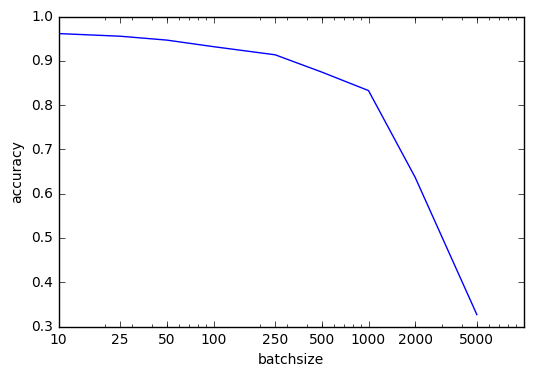

In [68]:
fig, ax = plt.subplots()
ax.plot(list(batch_sizes),mean_accuracy)
ax.set_xlabel("batchsize")
ax.set_ylabel("accuracy")
ax.set_xscale('log')
ax.set_xticks(list(batch_sizes))
ax.set_xticklabels(list(batch_sizes))

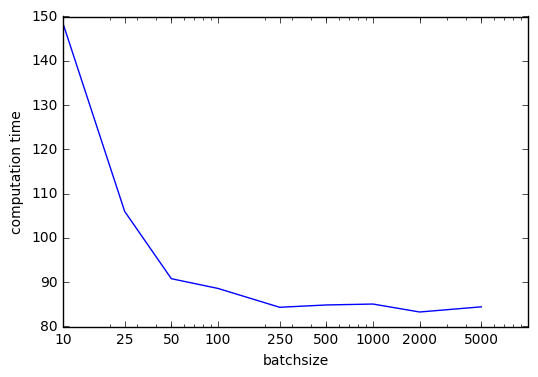

In [70]:
fig, ax = plt.subplots()
ax.plot(list(batch_sizes),mean_time)
ax.set_xlabel("batchsize")
ax.set_ylabel("computation time")
ax.set_xscale('log')
ax.set_xticks(list(batch_sizes))
ax.set_xticklabels(list(batch_sizes))

In [75]:
def train_and_test_conv_neural_net2(x, y, weights, biases, epochs = 1):
    
    pred = conv_neural_net(x, weights, biases)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred,y))
    opt = tf.train.AdamOptimizer().minimize(cost)
    
    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())
        for e in range(epochs):
            epoch_loss = 0
            for i in range(int(mnist.train.num_examples/batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                _, c = sess.run([opt, cost], 
                                feed_dict = {x:epoch_x, y:epoch_y})
                epoch_loss = epoch_loss + c
            print('Epoch ' + str(e+1) + ' out of ' + 
            str(epochs) + ' / Loss: ' + str(epoch_loss))
            
            correct = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
            accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
            print('Accuracy: ' + str(accuracy.eval({x:mnist.test.images, 
                                                y:mnist.test.labels})))
            accuracy_per_epoch[e] = accuracy.eval({x:mnist.test.images, 
                                                y:mnist.test.labels})

        print( 'Training finished!'  )

In [77]:
batch_size=50
accuracy_per_epoch = [_ for _ in range(20)]
train_and_test_conv_neural_net2(x, y, weights, biases, 20)

Epoch 1 out of 20 / Loss: 2218956.86021
Accuracy: 0.9305
Epoch 2 out of 20 / Loss: 523046.331117
Accuracy: 0.9619
Epoch 3 out of 20 / Loss: 296292.175006
Accuracy: 0.971
Epoch 4 out of 20 / Loss: 203252.725042
Accuracy: 0.9754
Epoch 5 out of 20 / Loss: 123716.489415
Accuracy: 0.9809
Epoch 6 out of 20 / Loss: 88301.1970553
Accuracy: 0.9742
Epoch 7 out of 20 / Loss: 64448.0180187
Accuracy: 0.9807
Epoch 8 out of 20 / Loss: 47410.4860574
Accuracy: 0.9816
Epoch 9 out of 20 / Loss: 34301.0037902
Accuracy: 0.9814
Epoch 10 out of 20 / Loss: 31849.4928268
Accuracy: 0.9844
Epoch 11 out of 20 / Loss: 27564.2912898
Accuracy: 0.9792
Epoch 12 out of 20 / Loss: 18866.9732575
Accuracy: 0.9837
Epoch 13 out of 20 / Loss: 17400.646472
Accuracy: 0.9839
Epoch 14 out of 20 / Loss: 17174.7338443
Accuracy: 0.9841
Epoch 15 out of 20 / Loss: 13868.2878279
Accuracy: 0.9849
Epoch 16 out of 20 / Loss: 12685.9050107
Accuracy: 0.9827
Epoch 17 out of 20 / Loss: 11972.4618111
Accuracy: 0.985
Epoch 18 out of 20 / Loss:

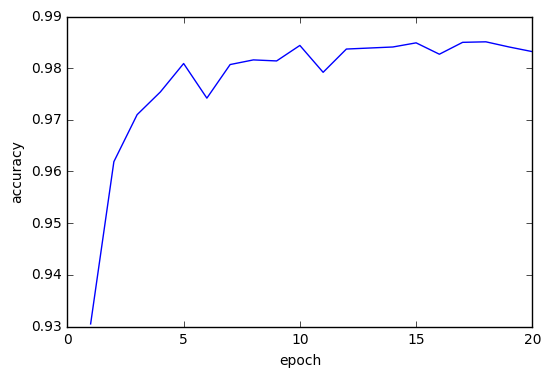

In [83]:
fig, ax = plt.subplots()
ax.plot([_+1 for _ in range(20)],accuracy_per_epoch)
ax.set_xlabel("epoch")
ax.set_ylabel("accuracy")